
#  Wine Quality Analysis #

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import os


# 1. Data Loading & Validation

In [11]:
print("=" * 50)
print("STEP 1: DATA LOADING")
print("=" * 50)

# 定义预期的列名（基于图片信息）
expected_columns = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates',
    'alcohol', 'quality'
]

# 获取当前工作目录
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# 检查文件是否存在
file_path = os.path.join(current_dir, 'winequality-red.csv')
print(f"Looking for file at: {file_path}")

if not os.path.exists(file_path):
    print(f"❌ ERROR: File not found at {file_path}")
    exit()

# 尝试不同的分隔符加载数据
try:
    # 尝试分号分隔符（基于图片信息）
    df = pd.read_csv(file_path, sep=';')
    print("Attempted separator: semicolon (;)")

    # 验证列名
    missing_cols = [col for col in expected_columns if col not in df.columns]
    if missing_cols:
        print(f"❌ Missing columns with semicolon separator: {missing_cols}")

        # 尝试逗号分隔符
        df = pd.read_csv(file_path, sep=',')
        print("Attempted separator: comma (,)")

        # 再次验证列名
        missing_cols = [col for col in expected_columns if col not in df.columns]
        if missing_cols:
            print(f"❌ Missing columns with comma separator: {missing_cols}")
            print("💡 TIP: Check actual file content and separator")
            exit()

    print("✅ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 3 rows:")
    print(df.head(3))

except Exception as e:
    print(f"❌ Data loading failed: {str(e)}")
    exit()


STEP 1: DATA LOADING
Current working directory: /Users/quanjin/Documents/Assignment/2025Spring/Statistical Learning
Looking for file at: /Users/quanjin/Documents/Assignment/2025Spring/Statistical Learning/winequality-red.csv
Attempted separator: semicolon (;)
❌ Missing columns with semicolon separator: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Attempted separator: comma (,)
✅ Data loaded successfully!
Dataset shape: (1599, 12)

First 3 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0    

# 2. Data Preprocessing

In [12]:
print("\n" + "=" * 50)
print("STEP 2: DATA PREPROCESSING")
print("=" * 50)

# 检查数据类型
print("\nData types before conversion:")
print(df.dtypes)

# 转换数据类型为数值型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查转换后的数据类型
print("\nData types after conversion:")
print(df.dtypes)

# 数据清洗
initial_count = len(df)
df_clean = df.dropna().drop_duplicates()
cleaned_count = len(df_clean)

print(f"\nInitial rows: {initial_count}")
print(f"After cleaning: {cleaned_count} rows")
print(f"Removed: {initial_count - cleaned_count} rows (missing values and duplicates)")



STEP 2: DATA PREPROCESSING

Data types before conversion:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Data types after conversion:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Initial rows: 1599
After cleaning: 1359 rows
Removed: 240 rows (missing values and duplicates)


# 3. Exploratory Analysis


STEP 3: EXPLORATORY ANALYSIS


/var/folders/1d/fnf8dc_16lsglq5xgy1k50c00000gn/T/ipykernel_81372/1527380376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_clean, palette='viridis')


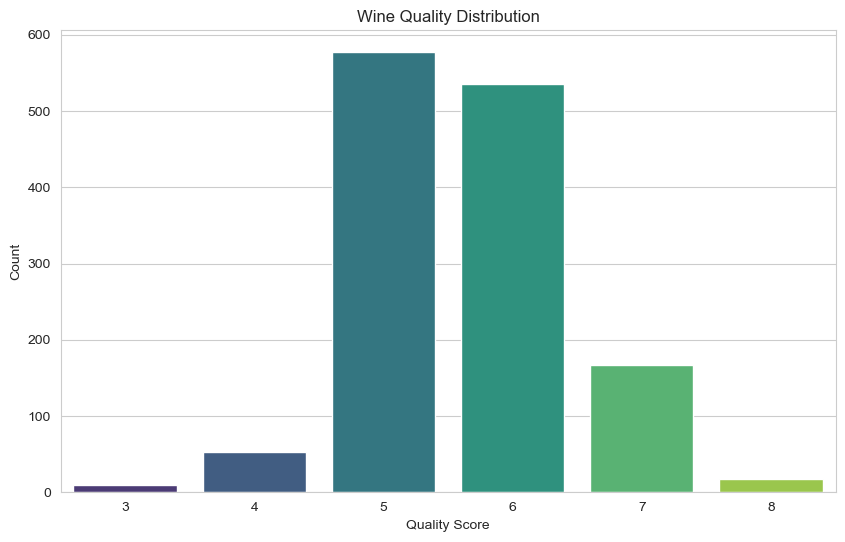

In [13]:
print("\n" + "=" * 50)
print("STEP 3: EXPLORATORY ANALYSIS")
print("=" * 50)

# 质量分布分析
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df_clean, palette='viridis')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.savefig('quality_distribution.png')
plt.show()


# 4. Correlation Analysis


STEP 4: CORRELATION ANALYSIS

Correlation with Quality:
quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


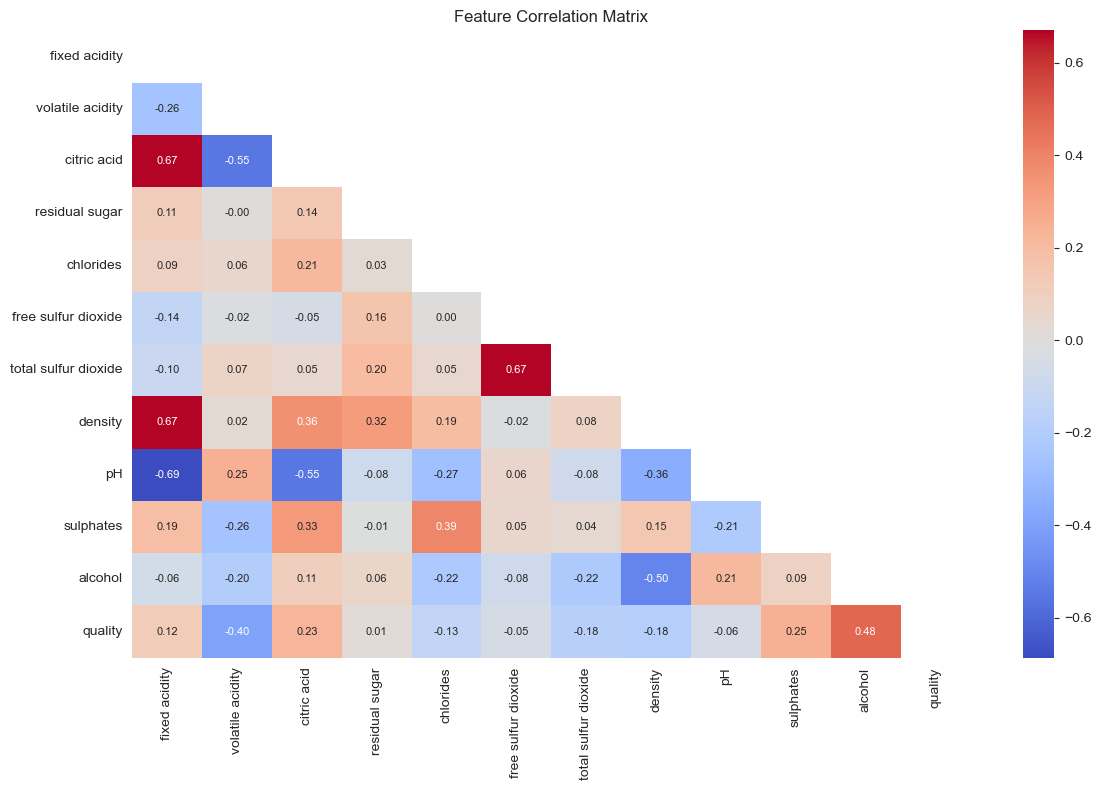

In [14]:
print("\n" + "=" * 50)
print("STEP 4: CORRELATION ANALYSIS")
print("=" * 50)

# 计算相关性
corr_matrix = df_clean.corr(numeric_only=True)

# 输出与质量相关性最高的特征
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("\nCorrelation with Quality:")
print(quality_corr)

# 可视化相关性矩阵
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            annot_kws={"size": 8},
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()


# 5. K-Means Clustering Analysis


STEP 5: K-MEANS CLUSTERING


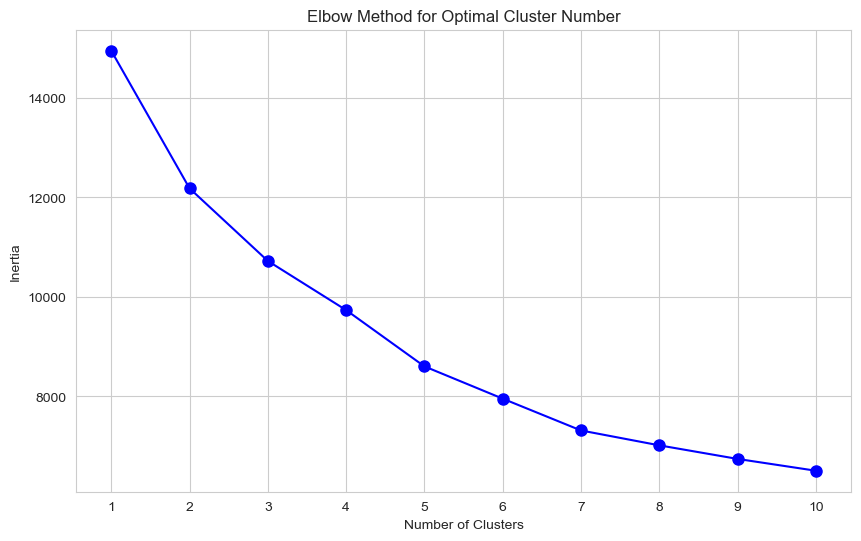


Selected number of clusters: 3
Silhouette Score: 0.188


In [15]:
print("\n" + "=" * 50)
print("STEP 5: K-MEANS CLUSTERING")
print("=" * 50)

# 特征选择 & 标准化
features = df_clean.columns.drop('quality')
X = df_clean[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 肘部法则分析
inertias = []
k_range = range(1, 11)

plt.figure(figsize=(10, 6))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, 'bo-', markersize=8)
plt.xticks(k_range)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

# 选择最佳聚类数（这里选择3，但实际应根据肘部法则结果调整）
best_k = 3
print(f"\nSelected number of clusters: {best_k}")

# 应用K-Means聚类
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df_clean['Cluster'] = cluster_labels

# 计算轮廓系数
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


# 6. Cluster Analysis

In [16]:
print("\n" + "=" * 50)
print("STEP 6: CLUSTER ANALYSIS")
print("=" * 50)

# 聚类分布
print("\nCluster Distribution:")
print(df_clean['Cluster'].value_counts().sort_index())

# 聚类质量分析
print("\nQuality by Cluster:")
print(df_clean.groupby('Cluster')['quality'].agg(['mean', 'median', 'std']))

# 聚类特征分析
print("\nCluster Characteristics:")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)


STEP 6: CLUSTER ANALYSIS

Cluster Distribution:
0    319
1    608
2    432
Name: Cluster, dtype: int64

Quality by Cluster:
             mean  median       std
Cluster                            
0        5.322884     5.0  0.582078
1        5.537829     6.0  0.824991
2        5.965278     6.0  0.856907

Cluster Characteristics:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       8.168025          0.534357     0.292915        3.009875   0.087483   
1       7.168092          0.614836     0.121743        2.232401   0.078660   
2      10.023843          0.405741     0.469074        2.573727   0.101917   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            26.967085             90.841693  0.997246  3.276834   0.625141   
1            13.397204             35.009868  0.995868  3.408503   0.606414   
2            11.229167             30.953704  0.997496  3.195185   0.757083   

     alcohol  
0   9.835371  
1  10.519

# 7. Visualization


STEP 7: VISUALIZATION


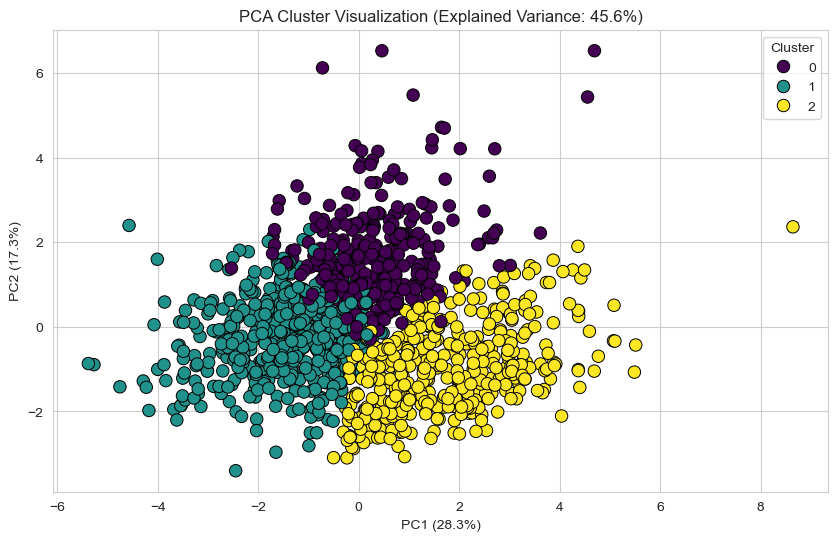

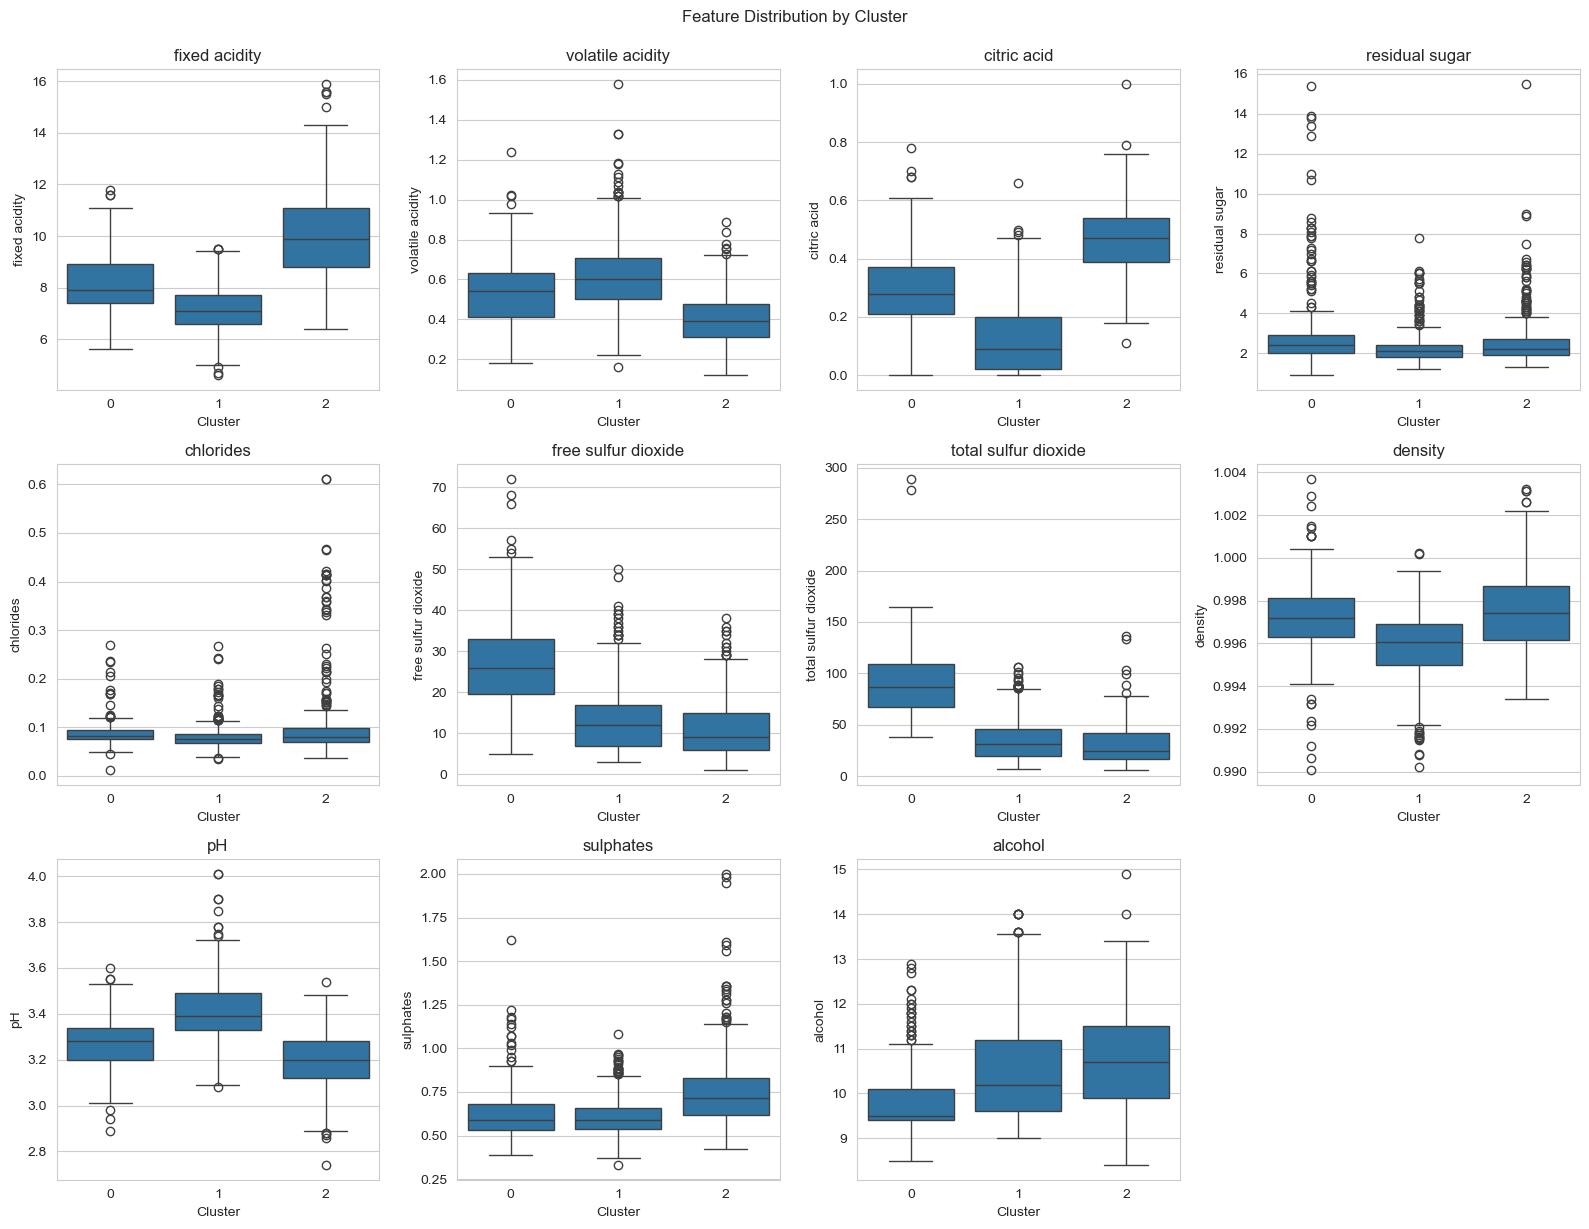

In [17]:
print("\n" + "=" * 50)
print("STEP 7: VISUALIZATION")
print("=" * 50)

# PCA降维可视化
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0],
                y=principal_components[:, 1],
                hue=cluster_labels,
                palette='viridis',
                s=80,
                edgecolor='black')
plt.title(f'PCA Cluster Visualization (Explained Variance: {pca.explained_variance_ratio_.sum():.1%})')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.legend(title='Cluster')
plt.savefig('pca_clusters.png')
plt.show()

# 特征箱线图
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Cluster', y=feature, data=df_clean)
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Feature Distribution by Cluster', y=1.02)
plt.savefig('cluster_features.png')
plt.show()


# 8. Save Results

In [18]:
df_clean.to_csv('clustered_wine_data.csv', index=False)
print("\nResults saved to 'clustered_wine_data.csv'")
print("=" * 50)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 50)


Results saved to 'clustered_wine_data.csv'
ANALYSIS COMPLETED SUCCESSFULLY!
